In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_clinicals = pd.read_csv(mouse_drug_data_to_load)
drug_clinicals = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_drug_clinicals = pd.merge(mouse_clinicals, drug_clinicals, on="Mouse ID", how="left")

# Display the data table for preview
mouse_drug_clinicals.head()
#Was it supposed to be done already? I did the gitpull already. But I'm gonna be transparent here and admit this was all like this from the start
#Because I wanna be honorable here I can see this first header shows the drug Stelasyn, and that it doesn't seem to work well based on the first 5 lines of data
#I googled what metastatis is and obviously it's ideal that metastatic sites stay at 0, this Stelasyn treatment didn't do that. It's probably not what we wanna sell

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [41]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = mouse_drug_clinicals.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_metastatic_sites = mouse_drug_clinicals.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame(mean_tumor_vol)
mean_metastatic_sites = pd.DataFrame(mean_metastatic_sites)

# Preview DataFrame
mean_tumor_vol.to_csv("tumorvol.csv")
mean_metastatic_sites.to_csv("metasites.csv")

#based on this, timepoint shows tumor volume did decrease over time, this is a good sign. 
#changed the groupby the metastatic sites to see the changes for capomulin, as volume decreases, metastatic sites increased. This is not good, because it may combat initial tumor growth but doesn't prevent spreading
#changes the groupby back to timepoint
#added a mean dataframe for metastatic sites as well as tumor volume
#I dunno how, but at some point I had two cursors and was typing on two lines at once...ope

In [44]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = mouse_drug_clinicals.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
sem_metastatic_sites = mouse_drug_clinicals.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sem_tumor_vol = pd.DataFrame(sem_tumor_vol)
sem_metastatic_sites = pd.DataFrame(sem_metastatic_sites)
# Preview DataFrame
sem_tumor_vol
#sem_metastatic_sites
#this .sem function is interesting, the data is visualized differently than when used by mean. I prefer sem function over mean function.
#redid the groupby based on metastatic sites again, and we can see as timepoint goes on metastatic sites start popping up more. Not good.
#changed the groupby back to track tumor volume
#took off the header so I could look at the long data
#tried adding to the sem list so I could track both tumor volume and metastatic sites, it apparently doesn't like multiple arguments and gave me an error message 
#added a new variable for metastatic sites, it works fine. I consider both tumor volume and metastatic sites to be equally important data to track


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [43]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol.reset_index()
sem_tumor_vol.reset_index()
sem_metastatic_sites.reset_index()
# Preview that Reformatting worked
#sem_tumor_vol.head()
sem_metastatic_sites
#I dunno what reset index does but the data looks nicer so I'm converting my new variable to this also


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [5]:
#Nicholas Bergfeld [11:06 AM]
#So if anyone is interested, using the subplot function can display two graphs
#plt.subplot(1, 2, 1) <This line says that the next line graph will be subplot 1
#*insert your graph line here*
#plt.subplot(1, 2, 2) <The two in the 3rd numerical slot indicates it's for the second graph
#*insert your other graph line her*
# I copied this from the slack so I remember how to do double graphing

<Figure size 7200x3600 with 0 Axes>

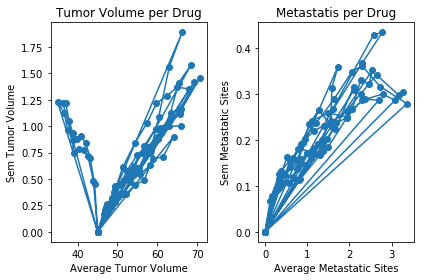

<Figure size 7200x3600 with 0 Axes>

In [6]:
# Generate the Plot (with Error Bars)
plt.subplot(1, 2, 1)
plt.errorbar(mean_tumor_vol, sem_tumor_vol, marker="o")
plt.title("Tumor Volume per Drug")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Sem Tumor Volume")
plt.subplot(1, 2, 2)
plt.title("Metastatis per Drug")
plt.xlabel("Average Metastatic Sites")
plt.ylabel("Sem Metastatic Sites")
plt.errorbar(mean_metastatic_sites, sem_metastatic_sites, marker="o")
plt.tight_layout()
plt.figure(figsize=(100, 50))
# Save the Figure
# we already have an error bar, but no labels! Let's fix that!
# before that, I did a double graph, now comes the time to label it...not sure if this will work for both, but let's see
# IT WORKS!!! :D But it's overlapping a bit, and that's ugly so I'm gonna try and display it more evenly
# tight layout seems helpful, but the scale size of the graphs isn't big enough, so next I'll address that.
# figsize helped with that a little but not enough...hmm...I'll come back here

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
#Hey, I did all that!!! I'm gonna skip this section since I technically did it already. whoops


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [12]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [36]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#.dtypes
#len(mouse_drug_clinicals["Mouse ID"])
#there are 1906 total mice
#tried sortby, didn't work
#tried groupby, didn't display the way I wanted
ID = mouse_drug_clinicals["Mouse ID"].value_counts()
mousein = mouse_drug_clinicals.set_index("Mouse ID")
#mousein.describe() #this shows that the lowest tumor volume is 22 and highest is 78.5. The lowest amount of metastatic sites is 0, and the hgihest is 4
mousesort = mousein.sort_values(["Timepoint", "Drug"], ascending=True)
#mousegroup = mousesort.groupby("Mouse ID").counts()
#mousecount = mousegroup["Mouse ID"].counts()
#mousegroup.head() #mousegroup isn't working and neither is mousecount. Even though I'm very sure the syntax is correct, it won't count or group things
mouseloc = mousesort.loc[:,["Drug", "Timepoint"]]
#mouseloc45 = mouseloc.loc[(mouseloc["Timepoint"] == "45") | (
    #mouseloc["Timepoint"] == "0"), :]
#mouseloc45 tried to search to only return the timepoint 45 to see if the mouse survived the trial, didn't get it to display
#trying to check the drug and mouse ID to make sure that the mouse survived
#value count worked, not sure how I wanna quantify this. They aren't integers
# Convert to DataFrame
#Not sure how
#mousesort is working, but it's a very long dataframe, and it's hard to read. Grouping is not working but I have to try graphing it, it's the closest I've gotten
# Preview DataFrame


TypeError: invalid type comparison

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)
mousechart = mousesort.plot(kind='bar')
mousechart.set_xlabel("Metastatic Sites")
mousechart.set_ylabel("Tumor Volume")
plt.show()
plt.tight_layout()
#this one has the same issue from the lower lines, the x label is horribly obscured. This is even worse than the lower one. I can't present this, it's unreadable. I'm tired. I will ask for help today. 
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug
#ousegroup = mouse_drug_clinicals.groupby(["Drug"])
#ousegroup.head()
# Display th.heaa to confirm #my keyboard was acting up here
#ousegroup = mouse_drug_clinicals.groupby('Drug')
#ousegroup.head()
#mousechart = mouse_drug_clinicals.plot(kind='line')
#mousechart.set_xlabel("Metastatic Sites")
#mousechart.set_ylabel("Tumor Volume")
#plt.show()
#plt.tight_layout()
#plt.figure(figsize=(3, 33))
#drug names are obscured, this is not presentable, I will attempt to redo figsize
#drug names are still obscured. I will attempt reversing the y and x label
#drug names are STILL obscured, I will instead use a line graph. Bar graphs with this much data are not presentable
#even after setting labels, the drug names aren't listed here, this is unusual. I'm very certain the labels are set properly. The data is visible but the labels don't tell me what is represented
#no matter what I do, the groupby function does not work
#changing labels doesn't help much to visualize the data the x label is ridiculously obscured regardless and figure size changes aren't helping

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()